## Introduction
  
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. The original source for this data can be found on this http://insideairbnb.com/. In this article, we will explore this data to gain valuable insights into listings.

Let us start by loading up the necessary packages.

In [2]:
# Read data
import pandas as pd
import numpy as np
# Visualize data
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

We can read the data from the CSV file into a dataframe. This data has already been cleaned up nicely and hence we don't need to do any pre-processing before analyzing it.

In [27]:
colnames=['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
url='https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv'
df=pd.read_csv(url,names=colnames, header=None)
df[df == '?'] = np.nan
df = df.dropna()

In [28]:
df.loc[:,df.columns!='party']=df.loc[:,df.columns!='party'].replace(['y','n'],[1,0])

In [29]:
data=df

In [30]:
from sklearn.model_selection import train_test_split
y=data['party'].values
X=data.drop('party', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## bulid pipeline

In [15]:
from sklearn.impute import SimpleImputer
simpleimputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')


In [16]:
from sklearn.svm import LinearSVC
model_svc=LinearSVC(random_state=0, tol=1e-05)

In [17]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [32]:
from sklearn.pipeline import make_pipeline
pipeline=make_pipeline(simpleimputer,scalar, model_svc)

In [33]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [37]:
pipeline.score(X_test, y_test)

0.9285714285714286

In [38]:
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    democrat       0.88      1.00      0.94        36
  republican       1.00      0.85      0.92        34

    accuracy                           0.93        70
   macro avg       0.94      0.93      0.93        70
weighted avg       0.94      0.93      0.93        70



In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[36  0]
 [ 5 29]]


# pipeline centering

In [79]:
url='https://assets.datacamp.com/production/repositories/628/datasets/2d9076606fb074c66420a36e06d7c7bc605459d4/white-wine.csv'
df=pd.read_csv(url)

In [80]:
df.quality=df.quality>6


In [81]:
X=df.loc[:,df.columns!='quality']
y=df.quality.to_numpy()

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

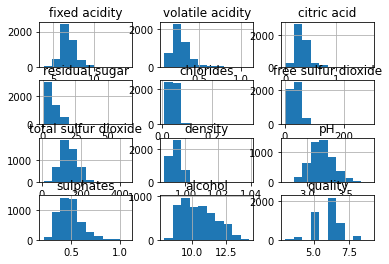

In [46]:
df.hist()

In [45]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21)

In [97]:
from sklearn.preprocessing import scale
from sklearn.svm import SVC
pipeline=make_pipeline(StandardScaler(), SVC())

In [98]:
pipeline.steps

[('standardscaler', StandardScaler()), ('svc', SVC())]

compring pipeline with simple SVM

In [91]:
knn_scaled =  pipeline.fit(X_train,y_train)
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
from sklearn.neighbors import KNeighborsClassifier
knn_unscaled = SVC().fit(X_train, y_train)
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.8224489795918367
Accuracy without Scaling: 0.7806122448979592


In [99]:
from sklearn.model_selection import GridSearchCV
parameters = {'svc__C':[1, 10, 100],'svc__gamma':[0.1, 0.01]}
cv = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=3)
cv.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [1, 10, 100], 'svc__gamma': [0.1, 0.01]})

In [100]:
print(cv.best_estimator_)
print(cv.best_params_)
print(cv.best_score_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=0.1))])
{'svc__C': 10, 'svc__gamma': 0.1}
0.8312914752424706


## Explore Data

There are many different questions we can explore with this data. Let us start by looking at the top neighborhoods with listings.

Let us visualize the data using a horizontal bar plot.

We can also visualize the top neighbourhoods as an interactive plot as well, using `plotly`. **Williamsburg** seems to have the most listings followed by **Bedford-Stuyvesant** and **Harlem**.

How about the distribution of prices across neighbourhoods? Rather than looking at neighbourhoods, we will focus our attention on neighbourhood groups.